## Heart Failure Prediction
### >Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
### >Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
### >People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.duplicated().sum()

0

### age
### anaemia: Decrease of red blood cells or hemoglobin (boolean)
### creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
### diabetes: If the patient has diabetes (boolean) 1-Yes,0-No
### ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
### high_blood_pressure: If the patient has hypertension (boolean)1-Yes,0-No
### platelets: Platelets in the blood (kiloplatelets/mL)
### serum_creatinine: Level of serum creatinine in the blood (mg/dL)
### serum_sodium: Level of serum sodium in the blood (mEq/L)
### sex: Woman or man (binary) 1-Woman,0-Man
### time: Follow-up period (days)
### Smoking 1-Smoking,0-Not Smoking
### DEATH_EVENT:If the patient deceased during the follow-up period (boolean)1-Died,0-Alive

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

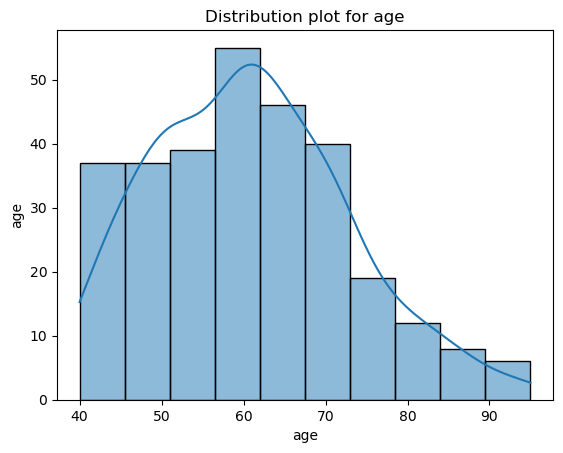

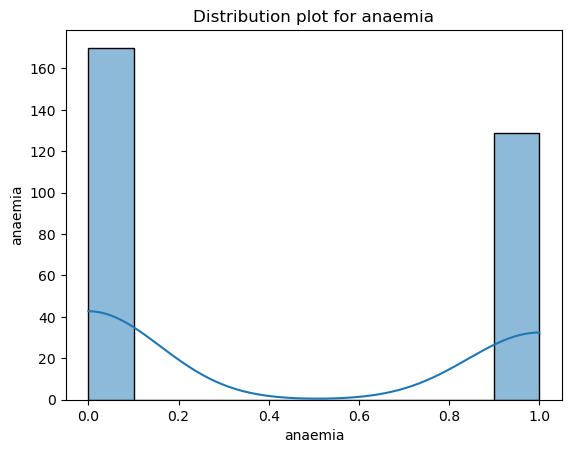

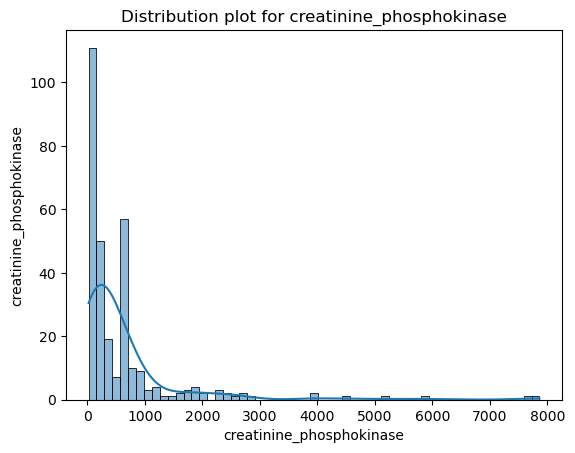

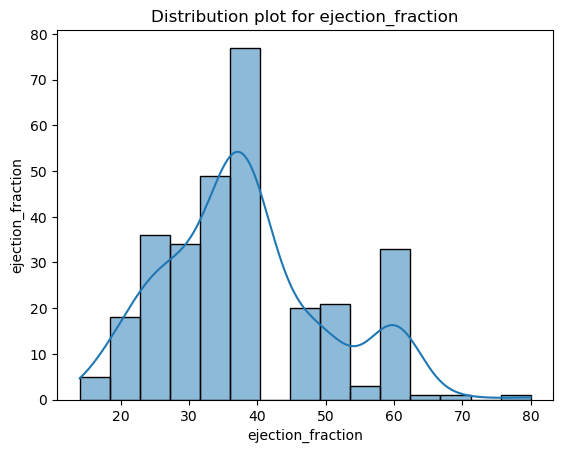

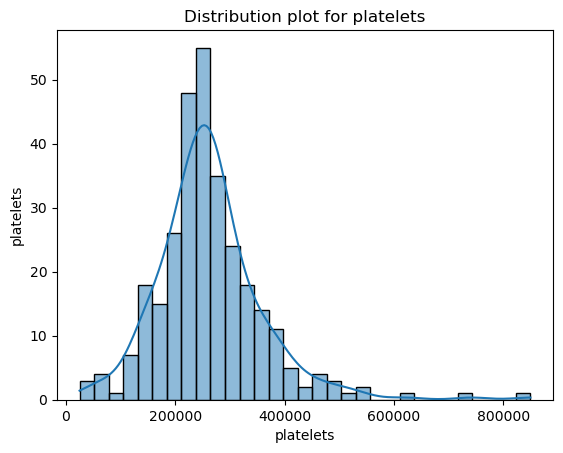

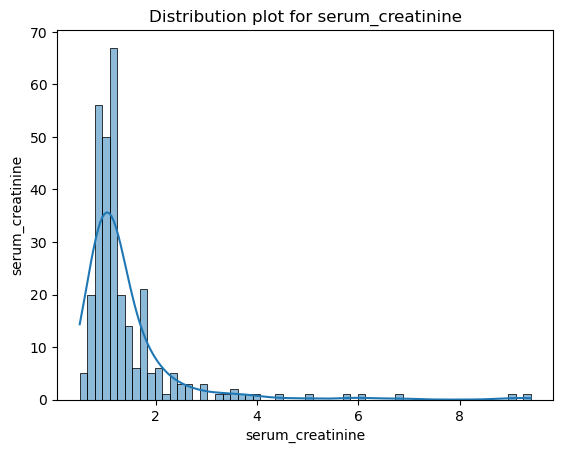

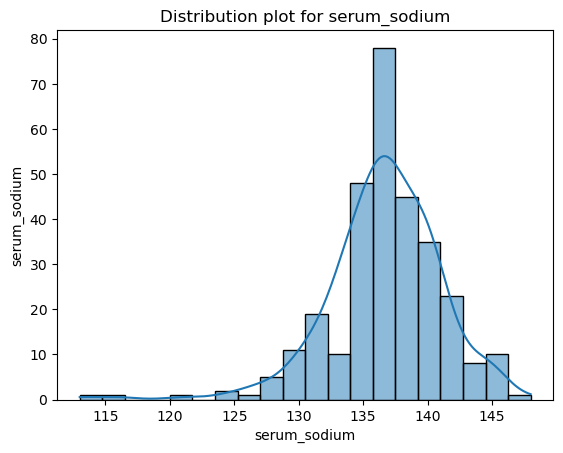

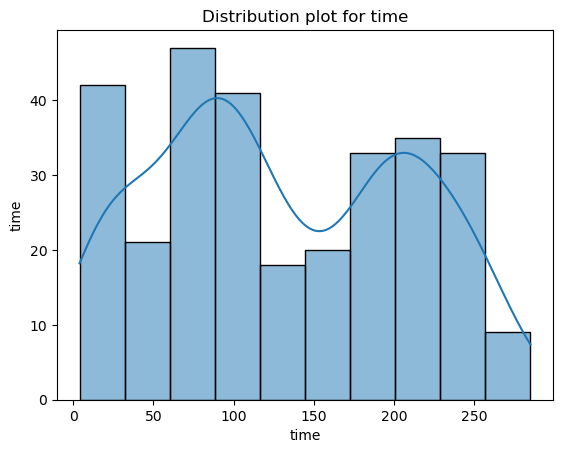

In [7]:
dist_cols = ['age', 'anaemia', 'creatinine_phosphokinase','ejection_fraction','platelets',
       'serum_creatinine', 'serum_sodium','time']
for i in dist_cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()


### Boxplot to check for outliers

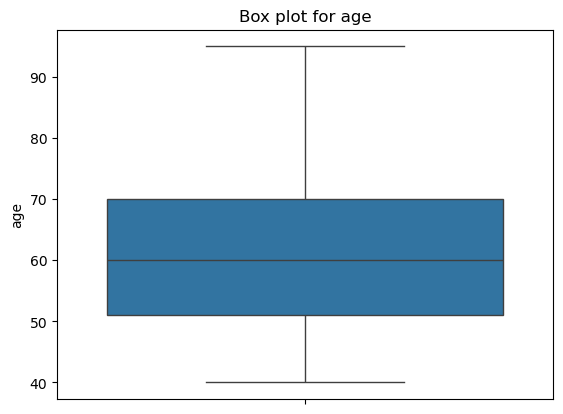

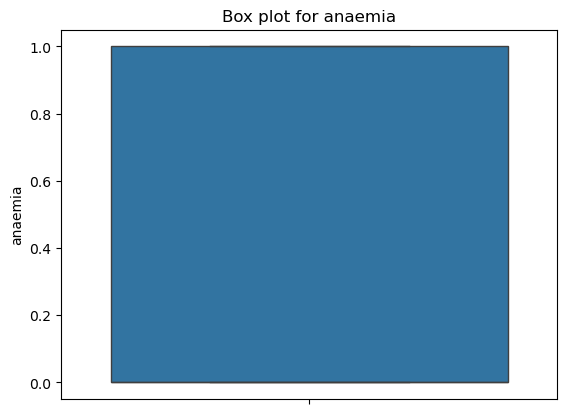

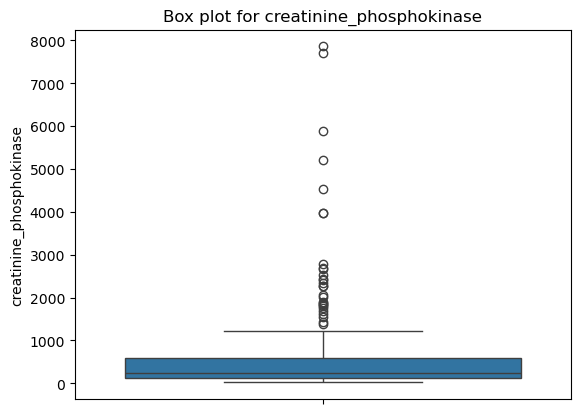

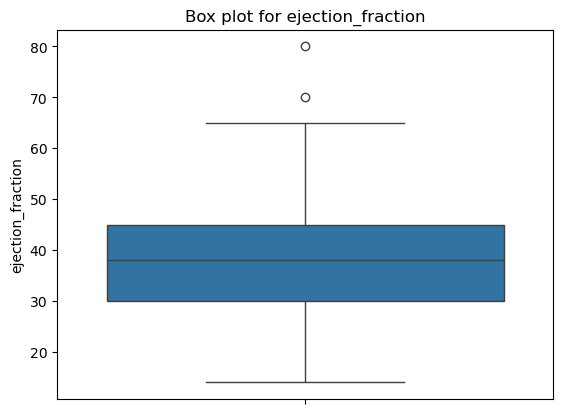

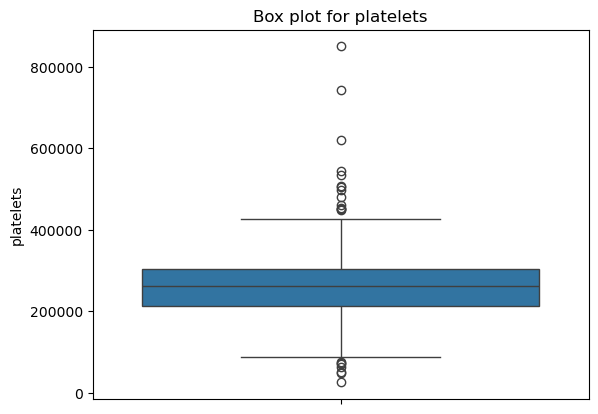

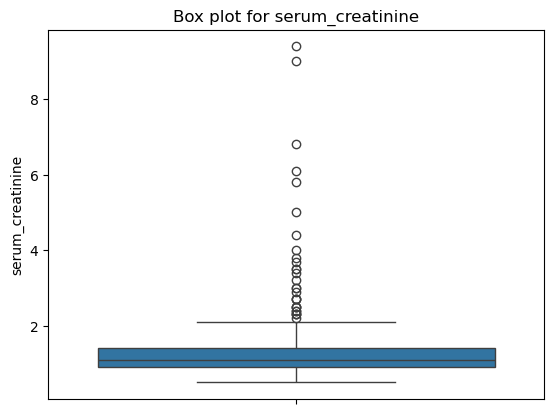

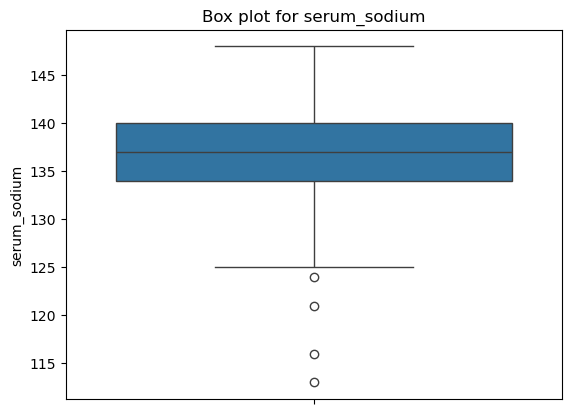

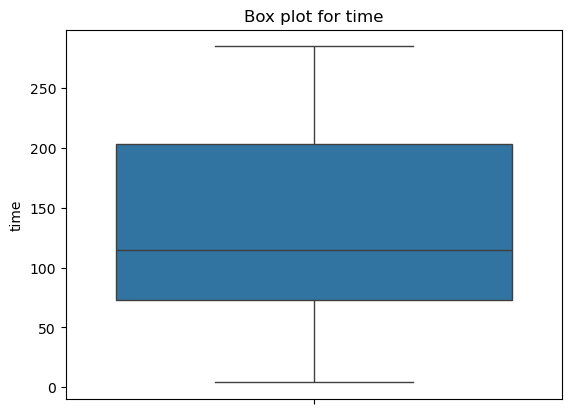

In [8]:
for i in dist_cols:
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

In [9]:
df.diabetes.value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

### Let's plot the count for binary columns

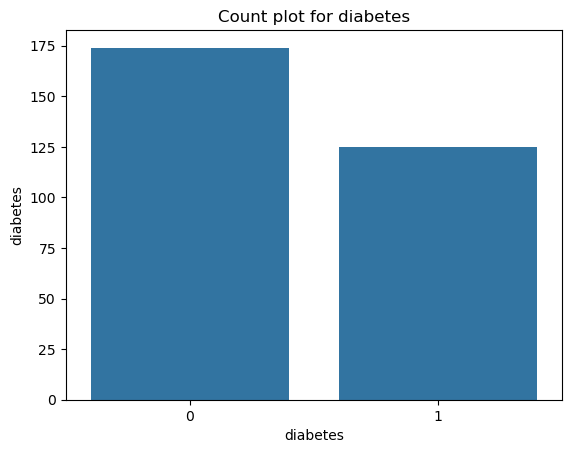

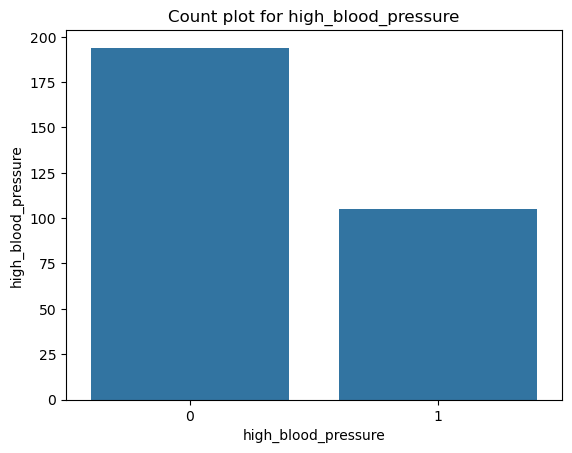

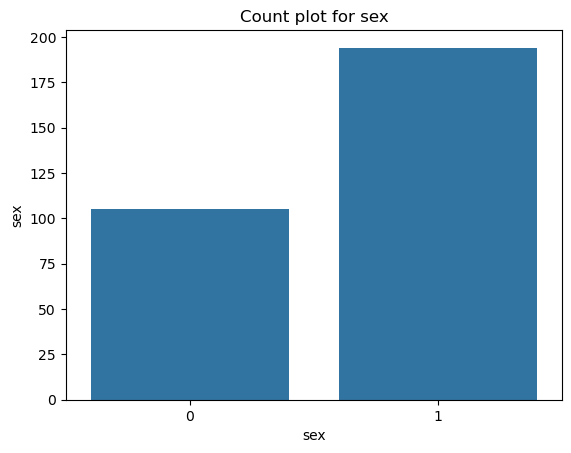

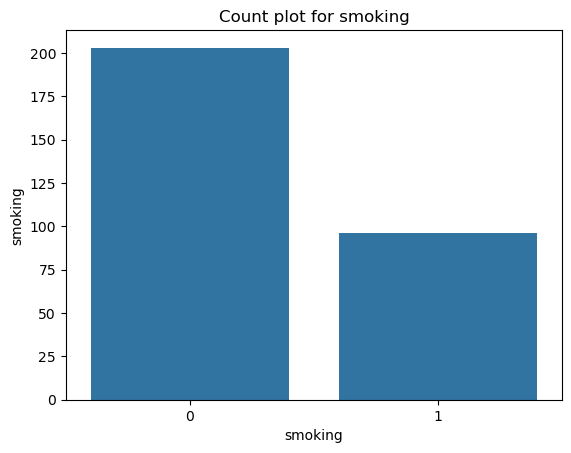

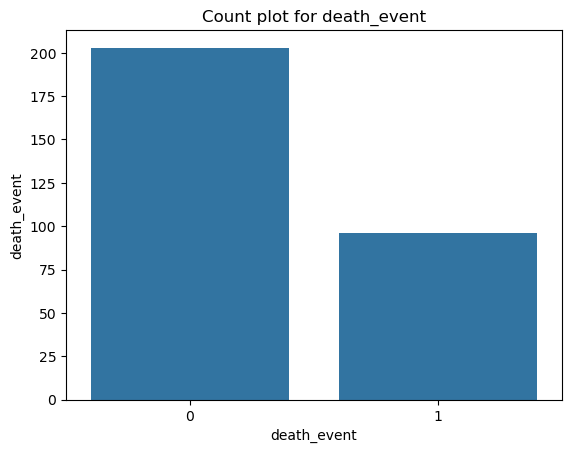

In [10]:
binary_cols = ['diabetes','high_blood_pressure','sex','smoking','death_event']
plt.figure()
for i in binary_cols:
    sns.countplot(x=df[i])
    plt.title(f'Count plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

<Axes: xlabel='creatinine_phosphokinase', ylabel='platelets'>

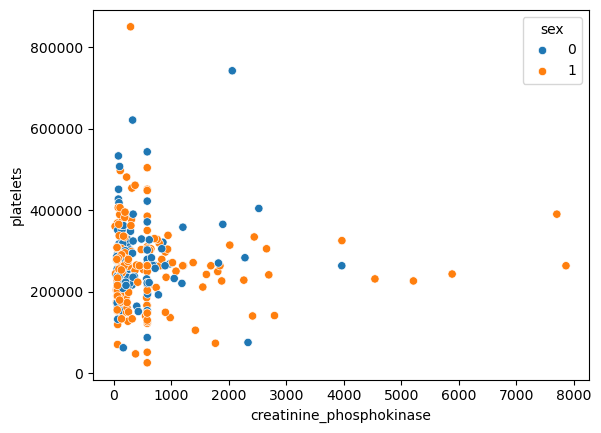

In [11]:
sns.scatterplot(x=df.creatinine_phosphokinase,y=df.platelets,hue=df.sex)

### Removing outliers

In [12]:
cols_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets',
       'serum_creatinine', 'serum_sodium']
for col in cols_with_outliers:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    
df.shape

(252, 13)

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [14]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Creating dependent and independent variables then scaling the data

In [15]:
X = df.drop('death_event',axis=1)
y = df.death_event
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

### Building different models

In [17]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [18]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.005058
0:	learn: 0.6893318	total: 706ms	remaining: 11m 45s
1:	learn: 0.6851902	total: 718ms	remaining: 5m 58s
2:	learn: 0.6804743	total: 728ms	remaining: 4m 1s
3:	learn: 0.6768136	total: 737ms	remaining: 3m 3s
4:	learn: 0.6726502	total: 747ms	remaining: 2m 28s
5:	learn: 0.6682636	total: 753ms	remaining: 2m 4s
6:	learn: 0.6643022	total: 762ms	remaining: 1m 48s
7:	learn: 0.6604977	total: 768ms	remaining: 1m 35s
8:	learn: 0.6573796	total: 772ms	remaining: 1m 25s
9:	learn: 0.6534749	total: 776ms	remaining: 1m 16s
10:	learn: 0.6503254	total: 779ms	remaining: 1m 10s
11:	learn: 0.6471281	total: 783ms	remaining: 1m 4s
12:	learn: 0.6443100	total: 787ms	remaining: 59.7s
13:	learn: 0.6407727	total: 790ms	remaining: 55.7s
14:	learn: 0.6367281	total: 794ms	remaining: 52.1s
15:	learn: 0.6333056	total: 797ms	remaining: 49s
16:	learn: 0.6292686	total: 801ms	remaining: 46.3s
17:	learn: 0.6248499	total: 804ms	remaining: 43.9s
18:	learn: 0.6199450	total: 807ms	remain

179:	learn: 0.3179050	total: 1.27s	remaining: 5.8s
180:	learn: 0.3168781	total: 1.28s	remaining: 5.78s
181:	learn: 0.3162244	total: 1.28s	remaining: 5.76s
182:	learn: 0.3151778	total: 1.28s	remaining: 5.74s
183:	learn: 0.3142588	total: 1.29s	remaining: 5.71s
184:	learn: 0.3133967	total: 1.29s	remaining: 5.69s
185:	learn: 0.3125507	total: 1.31s	remaining: 5.75s
186:	learn: 0.3113259	total: 1.32s	remaining: 5.74s
187:	learn: 0.3103549	total: 1.32s	remaining: 5.71s
188:	learn: 0.3095219	total: 1.32s	remaining: 5.69s
189:	learn: 0.3087184	total: 1.33s	remaining: 5.67s
190:	learn: 0.3078610	total: 1.33s	remaining: 5.64s
191:	learn: 0.3072225	total: 1.33s	remaining: 5.62s
192:	learn: 0.3064685	total: 1.34s	remaining: 5.59s
193:	learn: 0.3057565	total: 1.34s	remaining: 5.57s
194:	learn: 0.3048732	total: 1.34s	remaining: 5.54s
195:	learn: 0.3040368	total: 1.35s	remaining: 5.52s
196:	learn: 0.3031577	total: 1.35s	remaining: 5.5s
197:	learn: 0.3020007	total: 1.35s	remaining: 5.47s
198:	learn: 0.

380:	learn: 0.2013752	total: 1.87s	remaining: 3.04s
381:	learn: 0.2010326	total: 1.87s	remaining: 3.03s
382:	learn: 0.2008513	total: 1.88s	remaining: 3.02s
383:	learn: 0.2005978	total: 1.88s	remaining: 3.02s
384:	learn: 0.2000995	total: 1.88s	remaining: 3.01s
385:	learn: 0.1997272	total: 1.89s	remaining: 3s
386:	learn: 0.1994780	total: 1.89s	remaining: 2.99s
387:	learn: 0.1991203	total: 1.89s	remaining: 2.98s
388:	learn: 0.1988483	total: 1.9s	remaining: 2.98s
389:	learn: 0.1984728	total: 1.9s	remaining: 2.97s
390:	learn: 0.1982418	total: 1.9s	remaining: 2.96s
391:	learn: 0.1978132	total: 1.9s	remaining: 2.95s
392:	learn: 0.1975160	total: 1.91s	remaining: 2.94s
393:	learn: 0.1973556	total: 1.91s	remaining: 2.94s
394:	learn: 0.1970917	total: 1.91s	remaining: 2.93s
395:	learn: 0.1967439	total: 1.91s	remaining: 2.92s
396:	learn: 0.1962918	total: 1.92s	remaining: 2.91s
397:	learn: 0.1957531	total: 1.92s	remaining: 2.9s
398:	learn: 0.1955209	total: 1.92s	remaining: 2.9s
399:	learn: 0.1951825

575:	learn: 0.1461548	total: 2.46s	remaining: 1.81s
576:	learn: 0.1458923	total: 2.46s	remaining: 1.8s
577:	learn: 0.1455681	total: 2.46s	remaining: 1.8s
578:	learn: 0.1452417	total: 2.46s	remaining: 1.79s
579:	learn: 0.1451379	total: 2.47s	remaining: 1.79s
580:	learn: 0.1449876	total: 2.47s	remaining: 1.78s
581:	learn: 0.1448591	total: 2.47s	remaining: 1.78s
582:	learn: 0.1446408	total: 2.48s	remaining: 1.77s
583:	learn: 0.1443360	total: 2.48s	remaining: 1.76s
584:	learn: 0.1441408	total: 2.48s	remaining: 1.76s
585:	learn: 0.1438115	total: 2.48s	remaining: 1.75s
586:	learn: 0.1436595	total: 2.49s	remaining: 1.75s
587:	learn: 0.1434015	total: 2.49s	remaining: 1.75s
588:	learn: 0.1431490	total: 2.49s	remaining: 1.74s
589:	learn: 0.1429855	total: 2.5s	remaining: 1.73s
590:	learn: 0.1426505	total: 2.5s	remaining: 1.73s
591:	learn: 0.1424138	total: 2.5s	remaining: 1.73s
592:	learn: 0.1421685	total: 2.51s	remaining: 1.72s
593:	learn: 0.1418191	total: 2.51s	remaining: 1.71s
594:	learn: 0.141

765:	learn: 0.1116262	total: 3.04s	remaining: 930ms
766:	learn: 0.1116056	total: 3.05s	remaining: 926ms
767:	learn: 0.1115258	total: 3.05s	remaining: 921ms
768:	learn: 0.1114498	total: 3.05s	remaining: 917ms
769:	learn: 0.1113018	total: 3.05s	remaining: 912ms
770:	learn: 0.1112028	total: 3.06s	remaining: 908ms
771:	learn: 0.1110282	total: 3.06s	remaining: 904ms
772:	learn: 0.1108558	total: 3.06s	remaining: 899ms
773:	learn: 0.1107527	total: 3.06s	remaining: 895ms
774:	learn: 0.1106430	total: 3.07s	remaining: 891ms
775:	learn: 0.1104960	total: 3.07s	remaining: 886ms
776:	learn: 0.1103756	total: 3.07s	remaining: 882ms
777:	learn: 0.1102654	total: 3.08s	remaining: 878ms
778:	learn: 0.1101835	total: 3.08s	remaining: 873ms
779:	learn: 0.1100512	total: 3.08s	remaining: 869ms
780:	learn: 0.1098596	total: 3.08s	remaining: 864ms
781:	learn: 0.1097732	total: 3.09s	remaining: 860ms
782:	learn: 0.1095480	total: 3.09s	remaining: 856ms
783:	learn: 0.1094559	total: 3.09s	remaining: 852ms
784:	learn: 

979:	learn: 0.0849187	total: 3.61s	remaining: 73.7ms
980:	learn: 0.0847630	total: 3.62s	remaining: 70ms
981:	learn: 0.0846717	total: 3.62s	remaining: 66.3ms
982:	learn: 0.0846142	total: 3.62s	remaining: 62.6ms
983:	learn: 0.0844977	total: 3.62s	remaining: 58.9ms
984:	learn: 0.0843880	total: 3.63s	remaining: 55.2ms
985:	learn: 0.0842829	total: 3.63s	remaining: 51.5ms
986:	learn: 0.0841672	total: 3.63s	remaining: 47.8ms
987:	learn: 0.0840002	total: 3.63s	remaining: 44.1ms
988:	learn: 0.0838936	total: 3.64s	remaining: 40.4ms
989:	learn: 0.0837974	total: 3.64s	remaining: 36.8ms
990:	learn: 0.0837413	total: 3.64s	remaining: 33.1ms
991:	learn: 0.0835806	total: 3.64s	remaining: 29.4ms
992:	learn: 0.0834591	total: 3.65s	remaining: 25.7ms
993:	learn: 0.0834169	total: 3.65s	remaining: 22ms
994:	learn: 0.0832915	total: 3.65s	remaining: 18.3ms
995:	learn: 0.0831900	total: 3.65s	remaining: 14.7ms
996:	learn: 0.0830261	total: 3.66s	remaining: 11ms
997:	learn: 0.0829391	total: 3.66s	remaining: 7.33ms

### saving the model

In [19]:
classifier = models[best_model_name]

In [20]:
import pickle
data = {'model':classifier,'scaler':st_scaler}
with open('heart.pkl','wb') as file:
    pickle.dump(data,file)